# Generalized Vehicle Routing Problem

## Parser

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 12 22:46:37 2019

@author: andreamourelo
"""

from IPython.display import display, Markdown, Latex
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
import csv
import numpy as np
import sys, getopt

#def gvrp(filename, seed):
#print('Start processing file :', instance)

filename = 'GVRP/A-n32-k5-C11-V2.gvrp'
instance = (filename[:-5])
delimiter = ' '
#print(instance)

# No final, vamos ter:
# nodes = [node1, node2, ..., nodenNodes] = [[x_pos_node1, y_pos_node1, group_node_1], ....]
# com group_node entre [1, nGroups]

# e demands = [demand_group_1, demand_group_2, ..., demand_group_nGroups]
with open(filename,'r') as file:
    csv_reader = csv.reader(file,
                           delimiter = delimiter)
    line_count = 0
    node_count = 0
    group_count = 0
    nNodes, nGroups, nVehicles, capacity = 0,0,0,0
    for row in csv_reader:
        if line_count == 2 :  # DIMENSION : nNodes
            nNodes = int(row[2])
            nodes = np.zeros((nNodes,3), dtype=np.int)
        elif line_count == 3 : # VEHICLES : nVehicles
            nVehicles = int(row[2])
        elif line_count == 4 : # GVRP_SETS : nGroups
            nGroups = int(row[2])
            demands = np.zeros((nGroups), dtype=np.int)
        elif line_count == 5 :
            capacity = int(row[2]) # CAPACITY : capacity
        elif line_count >= 8 and line_count <= 8 + nNodes +  - 1: # Informacoes sobre as posicoes dos nos => num x_pos y_pos
            nodes[node_count] = [int(row[1]),int(row[2]), 0] # Ainda nao temos info sobre o grupo do nó, no depot vai ter grupo 0 
            node_count += 1
        elif line_count >= 8 + nNodes + 1 and line_count <= 8 + nNodes + nGroups: # Informacoes sobre os grupos => num_grupo elem elem ... elem -1
            nNodesInGroup = len(row)
            for numNode in range(1,nNodesInGroup - 1 ): # Para evitar o "-1" que mostra quando pular linha
                nodeOfGroup = int(row[numNode]) - 1
                nodes[nodeOfGroup][2]  = group_count + 1
            group_count += 1
            if group_count == nGroups:
                group_count = 0  # Reseteando no final para usar na leitura seguinte
        elif line_count >= 8 + nNodes + nGroups + 2 and line_count <= 8 + nNodes + 2*(nGroups + 1) - 1:
            demands[group_count] = int(row[1])
            group_count += 1
        line_count += 1

print(nNodes, nVehicles, nGroups, capacity)
print(nodes)
print(demands)  
    
    #print('Ending processing file :', instance)
    
#if __name__ == "__main__":
#    gvrp(sys.argv[1], seed) # Implement seed


32 2 11 100
[[82 76  0]
 [96 44  2]
 [50  5  6]
 [49  8  6]
 [13  7  1]
 [29 89  9]
 [58 30 10]
 [84 39 11]
 [14 24  1]
 [ 2 39  8]
 [ 3 82  3]
 [ 5 10  1]
 [98 52  2]
 [84 25 11]
 [61 59  5]
 [ 1 65  7]
 [88 51  2]
 [91  2  4]
 [19 32  8]
 [93  3  4]
 [50 93  9]
 [98 14  4]
 [ 5 42  8]
 [42  9  6]
 [61 62  5]
 [ 9 97  3]
 [80 55  2]
 [57 69  5]
 [23 15  1]
 [20 70  7]
 [85 60  2]
 [98  5  4]]
[13 14 16 16 15 11 12  7  7 12 16]


## Auxiliary functions

In [9]:
import random

# Função usada para o set up da seed a cada função, pois se não não funcionava
def set_seed():
    # Set a seed value: 
    seed_value = 1001004  
    # 1. Set PYTHONHASHSEED environment variable at a fixed value: 
    import os
    os.environ['PYTHONHASHSEED']=str(seed_value) 
    # 2. Set python built-in pseudo-random generator at a fixed value:
    random.seed(seed_value) 
    # 3. Set numpy pseudo-random generator at a fixed value:
    np.random.seed(seed_value) 

def createInitialSolutionRandomly(nVehicles, nGroups): # Doesnt YET check if the solution is FEASIBLE (capacities!!)
    # For now, creates list of np.arrays with each np.array being the route followed by a vehicle
    set_seed()
    routes = []
    for vehicle in range(nVehicles): # Preparing routes = [[],[],....,[]]
        routes.append([0])
    for group in range(nGroups): # Randomly assigning a vehicle for each group
        groupVehicle = random.randint(0,nVehicles - 1)
        routes[groupVehicle].append(group)
    for vehicle in range(nVehicles): # Preparing routes = [[],[],....,[]]
        routes.append(0)
    return routes
    #return [np.array(route) for route in routes]

def createInitialSolutionByBruteForce(nVehicles, nGroups, capacity, demands):
    routes = []
    for vehicle in range(nVehicles): # Preparing routes = [[],[],....,[]]
        routes.append([0]) # Todas começam em 0
    vehicleToFill = 0
    capacityFilled = 0
    capacities = []
    for group in range(1,nGroups):
        groupDemand = demands[group]
        space = capacity - capacityFilled
        if groupDemand < space:
            routes[vehicleToFill].append(group)
            capacityFilled += groupDemand
        else:
            capacities.append(capacityFilled)
            vehicleToFill += 1
            capacityFilled = 0
            routes[vehicleToFill].append(group)
            capacityFilled += groupDemand
    capacities.append(capacityFilled)
    #print('capacities : ',capacities)
    for vehicle in range(nVehicles): # Preparing routes = [[],[],....,[]]
        routes[vehicle].append(0) # Todas começam em 0
    return routes, capacities
    #return [np.array(route) for route in routes]
        
def localSearch(routes):
    return routes

def calculateDistance(routesWithNodes, distances):
    # We need nodes that are visited
    distance = 0
    for route in routesWithNodes:
        for node in range(len(route) - 1): # Evitating last one 
            distance += distances[route[node]][route[node + 1]]
    return distance

def perturbate(routes):
    return routes

def interPerturbation(route1, route2, routes):
    return routes

def intraPerturbation(route, group1, group2):
    return route

def twoOptIntra(route, group1, group2):
    # Will remove and replace 2 edges in the route
    # example: with route = [1,2,3,4,5,6,7,8], twoOptIntra(route, 2, 5) returns [1 2 3 6 5 4 7 8]
    temporary = route[group1 + 1 : group2]
    new_route = route[:group1 + 1] + [route[group2]] + temporary[::-1] + route[group2 + 1 : ]
    return new_route

def twoOptInter(route1, route2, group):
    # Will remove and replace 2 consecutive edges in two different routes
    # example : with route1 = [1,2,3,4,5,6,7,8] and route2 = [9,10,11,12]
    # twoOptInter(route1, route2, 1)
    # will give (array([ 1,  2, 11, 12]), array([ 9, 10,  3,  4,  5,  6,  7,  8]))
    new_route1 = route1[:group + 1] + route2[group + 1 :]
    new_route2 = route2[:group + 1] + route1[group + 1 :]
    return new_route1, new_route2

def cross(route1, route2, group1, group2):
    # Will exchange 2 sequences of visits
    # example : with route1 = [1,2,3,4,5,6,7,8] and route2 = [9,10,11,12]
    # cross(route1, route2, 1, 3)
    # will return ([1, 2, 11, 12, 5, 6, 7, 8], [9, 10, 3, 4])    
    route1_temporary, route2_temporary = twoOptInter(route1, route2, group1)
    route1_final, route2_final = twoOptInter(route1_temporary, route2_temporary, group2)
    return route1_final, route2_final

def checkCapacity(route, demands, capacity):
    demandOfRoute = 0
    for group in route:
        demandOfRoute += demands[group]
        if demandOfRoute > capacity :
            return False
    return True

# def calculateDistanceAfterChange(route, ...??):



In [3]:
route1 = [1,2,3,4,5,6,7,8]
#print(twoOptIntra(route1, 2, 5))
route2 = [9,10,11,12]
#print(twoOptInter(route1, route2, 1))
print(cross(route1,route2,1,3))

([1, 2, 11, 12, 5, 6, 7, 8], [9, 10, 3, 4])


In [11]:
distances = np.full((nNodes,nNodes), 100000000000)

for node in range(0,nNodes):
    for second_note in range(node+1,nNodes):
        x1, x2 = nodes[node][0], nodes[second_note][0]
        y1, y2 = nodes[node][1], nodes[second_note][1]
        distance2 = (x2 - x1)**2 + (y2 - y1)**2
        distances[node][second_note] = distance2
        distances[second_note][node] = distance2

distances = np.sqrt(distances)
print(pd.DataFrame(distances).head())

              0              1              2              3              4   \
0  316227.766017      34.928498      77.878110      75.584390      97.580736   
1      34.928498  316227.766017      60.307545      59.203040      90.873539   
2      77.878110      60.307545  316227.766017       3.162278      37.054015   
3      75.584390      59.203040       3.162278  316227.766017      36.013886   
4      97.580736      90.873539      37.054015      36.013886  316227.766017   

          5          6          7          8          9     ...      \
0  54.571055  51.884487  37.054015  85.603738  88.141931    ...       
1  80.709355  40.496913  13.000000  84.403791  94.132885    ...       
2  86.585218  26.248809  48.083261  40.706265  58.821765    ...       
3  83.432608  23.769729  46.754679  38.483763  56.302753    ...       
4  83.546394  50.537115  77.878110  17.029386  33.837849    ...       

          22         23         24          25         26         27  \
0  84.172442  78.032

In [5]:
#def FloydWarshall(distances):
#print("Adjacency matrix")
#print (distances)
parent = []
v = len(distances)
# path reconstruction matrix
p = np.zeros(distances.shape)
for i in range(0,v):
    for j in range(0,v):
        p[i,j] = distances[i,j]

print(v)

# initialize to infinity
for i in range (0, v):
    parent.append([])
    for j in range (0, v):
        parent[i].append(0)


# initialize the path matrix
for i in range (0,v):
    for j in range (0,v):
        if distances[i][j] == float("inf"):
            parent[i][j] = 0
        else:
            parent[i][j] = i


changed = 0
for k in range(0,v):
    for i in range(0,v):
        for j in range(0,v):
            if p[i,j] > p[i,k] + p[k,j]:
                p[i,j] = p[i,k] + p[k,j]
                parent[i][j] = parent[k][j]
                changed +=1
                
print("\n\n\n")
print(changed)
#print(parent)
# display shortest paths 


# recursive function to obtain the path as a string
def obtainPath(i, j):
    if distances[i][j] == float("inf"):
        return " no path to "
    if parent[i][j] == i:
        return " "
    else :
        return obtainPath(i, parent[i][j]) + str(parent[i][j]+1) + obtainPath(parent[i][j], j)

    
for i in range (0,v):
    print
    for j in range (0,v):
        print ("From :", i)
        print (" To :", j)
        print ("Path :" +  str(i) + obtainPath(i,j) + str(j))
        print ("Distance :", distances[i][j])
        print("\n")
#print (pd.DataFrame(p).head())

32




143
From : 0
 To : 0
Path :0 31 0
Distance : 10000000.0


From : 0
 To : 1
Path :0 1
Distance : 34.92849839314596


From : 0
 To : 2
Path :0 2
Distance : 77.87810988975015


From : 0
 To : 3
Path :0 3
Distance : 75.58438992278762


From : 0
 To : 4
Path :0 4
Distance : 97.58073580374356


From : 0
 To : 5
Path :0 5
Distance : 54.57105459856901


From : 0
 To : 6
Path :0 6
Distance : 51.884487084291386


From : 0
 To : 7
Path :0 7
Distance : 37.05401462729781


From : 0
 To : 8
Path :0 8
Distance : 85.60373823613078


From : 0
 To : 9
Path :0 9
Distance : 88.14193099768123


From : 0
 To : 10
Path :0 10
Distance : 79.22752047110903


From : 0
 To : 11
Path :0 11
Distance : 101.41498903022176


From : 0
 To : 12
Path :0 12
Distance : 28.844410203711913


From : 0
 To : 13
Path :0 13
Distance : 51.03920062069938


From : 0
 To : 14
Path :0 14
Distance : 27.018512172212592


From : 0
 To : 15
Path :0 15
Distance : 81.74350127074322


From : 0
 To : 16
Path :0 16
Distance : 25.709920

Distance : 101.91172650877817


From : 5
 To : 22
Path :5 22
Distance : 52.773099207835045


From : 5
 To : 23
Path :5 23
Distance : 81.04936767180853


From : 5
 To : 24
Path :5 24
Distance : 41.86884283091664


From : 5
 To : 25
Path :5 25
Distance : 21.540659228538015


From : 5
 To : 26
Path :5 26
Distance : 61.29437168288782


From : 5
 To : 27
Path :5 27
Distance : 34.40930106817051


From : 5
 To : 28
Path :5 28
Distance : 74.24284477308234


From : 5
 To : 29
Path :5 29
Distance : 21.02379604162864


From : 5
 To : 30
Path :5 30
Distance : 63.06346010171025


From : 5
 To : 31
Path :5 31
Distance : 108.70602559196064


From : 6
 To : 0
Path :6 0
Distance : 51.884487084291386


From : 6
 To : 1
Path :6 1
Distance : 40.496913462633174


From : 6
 To : 2
Path :6 2
Distance : 26.248809496813376


From : 6
 To : 3
Path :6 3
Distance : 23.769728648009426


From : 6
 To : 4
Path :6 4
Distance : 50.53711507397311


From : 6
 To : 5
Path :6 5
Distance : 65.7419196555744


From : 6
 To :

Path :13 15
Distance : 92.13576938409967


From : 13
 To : 16
Path :13 16
Distance : 26.30589287593181


From : 13
 To : 17
Path :13 17
Distance : 24.041630560342615


From : 13
 To : 18
Path :13 18
Distance : 65.37583651472461


From : 13
 To : 19
Path :13 19
Distance : 23.769728648009426


From : 13
 To : 20
Path :13 20
Distance : 76.02631123499285


From : 13
 To : 21
Path :13 21
Distance : 17.804493814764857


From : 13
 To : 22
Path :13 22
Distance : 80.8084154033477


From : 13
 To : 23
Path :13 23
Distance : 44.94441010848846


From : 13
 To : 24
Path :13 24
Distance : 43.56604182158393


From : 13
 To : 25
Path :13 25
Distance : 103.96634070698074


From : 13
 To : 26
Path :13 26
Distance : 30.265491900843113


From : 13
 To : 27
Path :13 27
Distance : 51.62363799656123


From : 13
 To : 28
Path :13 28
Distance : 61.814237842102365


From : 13
 To : 29
Path :13 29
Distance : 78.2368199762746


From : 13
 To : 30
Path :13 30
Distance : 35.014282800023196


From : 13
 To : 31
Pat

Path :21 9
Distance : 99.20181449953424


From : 21
 To : 10
Path :21 10
Distance : 116.8289347721702


From : 21
 To : 11
Path :21 11
Distance : 93.08598175880189


From : 21
 To : 12
Path :21 12
Distance : 38.0


From : 21
 To : 13
Path :21 13
Distance : 17.804493814764857


From : 21
 To : 14
Path :21 14
Distance : 58.25804665451803


From : 21
 To : 15
Path :21 15
Distance : 109.59014554237986


From : 21
 To : 16
Path :21 16
Distance : 38.3275357934736


From : 21
 To : 17
Path :21 17
Distance : 13.892443989449804


From : 21
 To : 18
Path :21 18
Distance : 81.02468759581859


From : 21
 To : 19
Path :21 19
Distance : 12.083045973594572


From : 21
 To : 20
Path :21 20
Distance : 92.43916918709297


From : 21
 To : 21
Path :21 32 21
Distance : 10000000.0


From : 21
 To : 22
Path :21 22
Distance : 97.12363255150623


From : 21
 To : 23
Path :21 23
Distance : 56.22277118748239


From : 21
 To : 24
Path :21 24
Distance : 60.60528029800704


From : 21
 To : 25
Path :21 25
Distance : 

 To : 3
Path :29 3
Distance : 68.4470598345904


From : 29
 To : 4
Path :29 4
Distance : 63.387695966961914


From : 29
 To : 5
Path :29 5
Distance : 21.02379604162864


From : 29
 To : 6
Path :29 6
Distance : 55.17245689653489


From : 29
 To : 7
Path :29 7
Distance : 71.11258679024411


From : 29
 To : 8
Path :29 8
Distance : 46.389654018972806


From : 29
 To : 9
Path :29 9
Distance : 35.84689665786984


From : 29
 To : 10
Path :29 10
Distance : 20.808652046684813


From : 29
 To : 11
Path :29 11
Distance : 61.84658438426491


From : 29
 To : 12
Path :29 12
Distance : 80.049984384758


From : 29
 To : 13
Path :29 13
Distance : 78.2368199762746


From : 29
 To : 14
Path :29 14
Distance : 42.44997055358225


From : 29
 To : 15
Path :29 15
Distance : 19.6468827043885


From : 29
 To : 16
Path :29 16
Distance : 70.60453243241541


From : 29
 To : 17
Path :29 17
Distance : 98.3107318658548


From : 29
 To : 18
Path :29 18
Distance : 38.01315561749642


From : 29
 To : 19
Path :29 19
Dist

## Main function

In [6]:
## Data structures

# To stop algorithm
import timeit

# Distance matrix
distances = np.zeros((nNodes,nNodes))

for node in range(0,nNodes):
    for second_note in range(node+1,nNodes):
        x1, x2 = nodes[node][0], nodes[second_note][0]
        y1, y2 = nodes[node][1], nodes[second_note][1]
        distance2 = (x2 - x1)**2 + (y2 - y1)**2
        distances[node][second_note] = distance2
        distances[second_note][node] = distance2

distances = np.sqrt(distances)
#print(distances)
#print(pd.DataFrame(distances).head())

## Create initial solution

# routes_initial = createInitialSolutionRandomly(nVehicles, nGroups)
routes_initial = createInitialSolutionByBruteForce(nVehicles, nGroups, capacity, demands)
print('initial routes : ', routes_initial)
routes = localSearch(routes_initial)
total_distance = calculateDistance(routes)

## ILS

# Time setting
inicio = timeit.default_timer()
fim = timeit.default_timer() - 15
time = fim - inicio
#print(inicio,fim,time)
iterations = 0

while(time < 2): # 2 seconds max
    
    perturbated_routes = perturbate(routes)
    new_routes = localSearch(perturbated_routes)
    new_distance = calculateDistance(new_routes)
    if new_distance < total_distance:
        total_distance = new_distance
        routes = new_routes
    iterations += 1
    #print(time)
    fim = timeit.default_timer()
    time = fim - inicio
    
print('number of iterations in 2 seconds : ', iterations)

initial routes :  ([[0, 1, 2, 3, 4, 5, 6, 7, 8, 0], [0, 9, 10, 0]], [98, 28])
number of iterations in 2 seconds :  2222876


In [10]:
## Data structures

# To stop algorithm
import timeit

# Distance matrix
distances = np.zeros((nNodes,nNodes))

for node in range(0,nNodes):
    for second_note in range(node+1,nNodes):
        x1, x2 = nodes[node][0], nodes[second_note][0]
        y1, y2 = nodes[node][1], nodes[second_note][1]
        distance2 = (x2 - x1)**2 + (y2 - y1)**2
        distances[node][second_note] = distance2
        distances[second_note][node] = distance2

distances = np.sqrt(distances)
#print(distances)
#print(pd.DataFrame(distances).head())

# Time setting
inicio = timeit.default_timer()
fim = timeit.default_timer() - 15
time = fim - inicio
#print(inicio,fim,time)

iterations = 0
grand_iterations = 0

## ILS
ils_parameter = 3
min_total_distance = 1000000
routes = []

while(time < 2): # 2 seconds max
    ## Create initial solution
    # routes_initial = createInitialSolutionRandomly(nVehicles, nGroups)
    routes_initial, demand_distribution = createInitialSolutionByBruteForce(nVehicles, nGroups, capacity, demands)
    #print('initial routes : ', routes_initial)

    routes_iteration = localSearch(routes_initial) # Applying local search to find local minimum
    min_total_distance_iteration = calculateDistance(routes)
    # Applying ils_parameter perturbations
    for i in range(ils_parameter): 
        perturbated_routes = perturbate(routes_iteration)
        new_routes = localSearch(perturbated_routes)
        new_distance = calculateDistance(new_routes)
        if new_distance < min_total_distance_iteration:
            min_total_distance_iteration = new_distance
            routes_iteration = new_routes
        iterations += 1
    # Checking if the solution of this iteration is better than the global solution
    if min_total_distance_iteration < min_total_distance:
        min_total_distance = min_total_distance_iteration
        routes = routes_iteration
    grand_iterations += 1 

    fim = timeit.default_timer()
    time = fim - inicio

print('number of grand iterations and iterations in 2 seconds : ', grand_iterations, iterations)
print(routes)
print(demand_distribution)
print(calculateDistance(routes, distances))

number of grand iterations and iterations in 2 seconds :  43499 130497
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 0], [0, 9, 10, 0]]
[98, 28]
678.7880756906183


## Plot

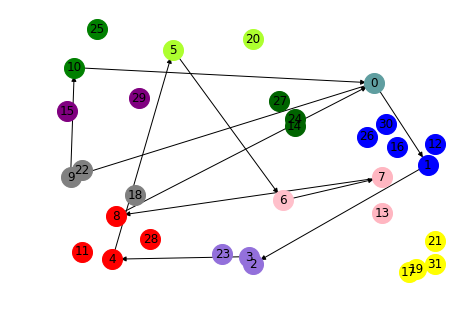

In [8]:
import networkx as nx
G = nx.DiGraph()

node = 1
#labels = {}
nodecolors = []
count_nodes = 0
for node in nodes:
    pos = [node[0],node[1]]
    G.add_node(count_nodes, pos = pos)
    G.node[count_nodes]['group'] = node[2]
    count_nodes+=1

# Mudar para pegar o elemento do grupo que é visitado POR GRUPO
for vehicleRoute in routes:
    for i in range(len(vehicleRoute) - 1):
        G.add_edge(vehicleRoute[i], vehicleRoute[i+1])
        
colors = ['cadetblue','red','blue','green','yellow', 'darkgreen', 'mediumpurple', 'purple', 'grey', 'greenyellow', 'pink', 'lightpink']
pos=nx.get_node_attributes(G,'pos')
#print(pos)
nx.draw(G, pos, with_labels = True)
for i in range(0,len(colors)):
    nodelist = []
    for node in G.nodes():
        #print(node)
        if G.node[node]['group'] == i:
            nodelist.append(node)
    nx.draw_networkx_nodes(G, pos=pos, nodelist=nodelist, node_size=400, node_color=colors[i], with_labels = True)
    #print(nodelist)
    i+=1